In [125]:
#constants:
M = 10
ALPHA = 1
BETA = 1
ITERATIONS = 5
E = 0.5

In [126]:
import numpy as np
import random
import math

np.set_printoptions(threshold=sys.maxsize)

#read data
d = open("d.txt").read().split()
f = open("f.txt").read().split()

#num of facilities and locations
n = int(math.sqrt(len(d)))

#convert to n*n matrix
D = np.reshape(d, (n, n)).T.astype(float)     #distance matrix
F = np.reshape(f, (n, n)).T.astype(float)     #flow matrix

#pad for start node 
D = np.pad(D, ((1,0),(1,0)), 'constant')
F = np.pad(F, ((1,0),(1,0)), 'constant')
#create start node and asign random pheremone(0,1)
random.seed(10)
random_d = [random.randint(1,9) for i in range(n)]
random_f = [random.randint(1,9) for i in range(n)]
#adjency matrix so start is 0 (cannot move from 0->0)
random_d.insert(0,0)
random_f.insert(0,0)

#update D and F
D[:,0] = D[0] = random_d
F[:,0] = F[0] = random_f

print(D.round(decimals=1))
print(F.round(decimals=1))

[[ 0.  1.  7.  8.  1.  4.  8.  8.  5.  3.  1.  9.  8.  6.  2.  4.  6.  1.
   7.  3.  6.  7.  7.  5.  5.  8.  3.  5.  6.  3.  8.  4.  8.  7.  1.  1.
   4.  3.  4.  5.  9.  6.  4.  6.  9.  8.  7.  8.  2.  6.  9.]
 [ 1.  0. 21. 95. 82. 56. 41.  6. 25. 10.  4. 63.  6. 44. 40. 75. 79.  0.
  89. 35.  9.  1. 85. 84. 12.  0. 26. 91. 11. 35. 82. 26. 69. 56. 86. 45.
  91. 59. 18. 76. 39. 18. 57. 36. 61. 36. 21. 71. 11. 29. 82.]
 [ 7. 21.  0. 82.  6. 71.  8. 77. 74. 30. 89. 76. 76. 40. 93. 56.  1. 50.
   4. 36. 27. 85.  2.  1. 15. 11. 35. 11. 20. 21. 61. 80. 58. 21. 76. 72.
  44. 85. 94. 90. 51.  3. 48. 29. 90. 66. 41. 15. 83. 96. 74.]
 [ 8. 95. 82.  0. 45. 65. 40. 54. 83. 14. 71. 77. 36. 53. 37. 26. 87. 76.
  91. 13. 29. 11. 77. 32. 87. 67. 94. 79.  2. 10. 99. 56. 70. 99. 60.  4.
  56.  2. 60. 72. 74. 46. 13. 20. 86.  4. 77. 15. 89. 48. 14.]
 [ 1. 82.  6. 45.  0. 89. 44. 59. 22. 57. 63.  6.  0. 62. 41. 62. 46. 25.
  75. 76. 40. 66. 58. 30. 68. 78. 91. 13. 59. 49. 85. 84.  8. 38. 41. 56.
  39. 53

In [127]:
def compute_numerator_matrix(nm):
    #Fill P with numerator
    for x in range (len(D)):
        for y in range (len(D[x])):
            if nm[x][y] != 0 or nm[x][y] != 0.0: 
                nm[x][y] = ((F[x][y])** ALPHA) * ((F[x][y])**BETA ) 
    return nm

#probabilty matrix
numerator_matrix_global = np.ones((n+1,n+1))
numerator_matrix_global = compute_numerator_matrix(numerator_matrix_global)

numerator_matrix_global

array([[0.000e+00, 9.000e+00, 1.600e+01, 4.900e+01, 1.600e+01, 1.000e+00,
        1.000e+00, 6.400e+01, 2.500e+01, 4.000e+00, 8.100e+01, 4.000e+00,
        9.000e+00, 4.900e+01, 3.600e+01, 9.000e+00, 4.000e+00, 4.000e+00,
        6.400e+01, 9.000e+00, 1.600e+01, 3.600e+01, 4.900e+01, 4.900e+01,
        6.400e+01, 1.600e+01, 2.500e+01, 9.000e+00, 8.100e+01, 9.000e+00,
        4.000e+00, 2.500e+01, 6.400e+01, 2.500e+01, 9.000e+00, 9.000e+00,
        9.000e+00, 6.400e+01, 3.600e+01, 3.600e+01, 4.900e+01, 1.600e+01,
        1.000e+00, 8.100e+01, 1.000e+00, 3.600e+01, 3.600e+01, 1.600e+01,
        4.000e+00, 2.500e+01, 6.400e+01],
       [9.000e+00, 0.000e+00, 9.409e+03, 4.000e+02, 8.836e+03, 1.764e+03,
        1.600e+01, 9.000e+02, 6.250e+02, 4.096e+03, 1.440e+02, 1.936e+03,
        5.476e+03, 9.216e+03, 2.916e+03, 1.936e+03, 1.024e+03, 5.476e+03,
        2.500e+01, 7.056e+03, 1.600e+01, 1.936e+03, 4.096e+03, 4.624e+03,
        1.444e+03, 1.225e+03, 8.410e+02, 1.210e+02, 1.521e+03, 4.761e+

In [128]:
def update_pheremones(paths, fitnesses):
    global numerator_matrix_global
    for h in range(len(paths)):
        for i in range(len(paths[h])-1):
            #update
            x = paths[h][i]
            y= paths[h][i+1]
            pheremone = 1/fitnesses[h]
            #D[x][y] = D[x][y]# + ( pheremone / len(paths[h]) )
            #F[x][y] = F[x][y]# + (pheremone / len(paths[h]) )
            numerator_matrix_global[x][y] = numerator_matrix_global[x][y] + (pheremone / len(paths[h]) )
            numerator_matrix_global = compute_numerator_matrix(numerator_matrix_global)

            #evaporate
            #D = D * E
            #F = F * E
            numerator_matrix_global = numerator_matrix_global * E

In [129]:
import collections
import sys
import copy
import matplotlib.pyplot as plt
import statistics


av_fitnesses = []
#epoch
for q in range(ITERATIONS):
    paths = []
    fitnesses = []
    # for each ant
    for z in range(M):
        #create copies for each ant
        numerator_matrix = copy.deepcopy(numerator_matrix_global)
        fitness = 0
        visited = []
        start = 0

        while len(visited) < n+1:
            visited.append(start)
            #get neibours from the row at numberatormatrix[start]
            neighbours = numerator_matrix[start]
            #set column to 0s to prevent backtracking
            numerator_matrix[:,start] = np.zeros(len(numerator_matrix[:,start]))
            #compute probability list of moving to neibours
            tru_prob = [i/sum(neighbours) for i in neighbours]

            #choose neighbout to travel to
            next_val = 0.0
            next = -1
            while next_val == 0.0 and next_val == 0 and next not in visited and next == -1:
                try:
                    next = np.random.choice(a=len(tru_prob), p=tru_prob)
                    next_val = tru_prob[next]
                    #print(next)
                    #print(numerator_matrix)
                except Exception as e:
                    #print(e)
                    break

            #compute new numerator matrix
            numerator_matrix = compute_numerator_matrix(numerator_matrix)

            start = next
            fitness = fitness + next_val
            
        print("Dupes: ", [item for item, count in collections.Counter(visited).items() if count > 1])
        print("visited: ", visited)
        print("fitness: ", fitness)

        paths.append(visited)
        fitnesses.append(fitness)

    #print(paths)
    print("\nAVERAGE FITNESS AFTER:", q+1, "ITERATIONS", statistics.mean(fitnesses))

    av_fitnesses.append(statistics.mean(fitnesses))

    update_pheremones(paths, fitnesses)


/tmp/ipykernel_3867/2226981526.py:28: RuntimeWarning: invalid value encountered in double_scalars
  tru_prob = [i/sum(neighbours) for i in neighbours]


Dupes:  []
visited:  [0, 28, 31, 23, 20, 11, 46, 24, 30, 39, 22, 26, 8, 13, 42, 37, 48, 1, 5, 21, 15, 10, 33, 38, 19, 45, 6, 34, 41, 25, 40, 36, 17, 27, 7, 47, 18, 43, 50, 9, 4, 16, 49, 35, 2, 29, 32, 12, 44, 14, 3]
fitness:  7.043004210128217
Dupes:  []
visited:  [0, 50, 42, 11, 25, 21, 30, 46, 36, 31, 17, 27, 9, 7, 33, 38, 1, 29, 2, 28, 19, 35, 12, 32, 4, 16, 37, 44, 41, 18, 23, 43, 15, 26, 13, 34, 39, 8, 49, 14, 40, 24, 20, 47, 48, 45, 5, 10, 6, 3, 22]
fitness:  7.187320479038378
Dupes:  []
visited:  [0, 18, 5, 30, 3, 10, 47, 33, 49, 35, 27, 20, 12, 23, 42, 37, 48, 2, 9, 1, 4, 16, 22, 41, 25, 44, 8, 7, 24, 13, 40, 32, 45, 6, 34, 39, 17, 36, 43, 21, 50, 38, 31, 28, 14, 11, 15, 26, 46, 29, 19]
fitness:  6.5617722944059915
Dupes:  []
visited:  [0, 20, 43, 46, 40, 49, 3, 9, 37, 5, 22, 25, 6, 24, 34, 41, 47, 35, 29, 21, 39, 23, 30, 8, 32, 27, 12, 7, 26, 31, 28, 18, 17, 16, 2, 1, 45, 38, 42, 33, 14, 10, 15, 11, 48, 36, 44, 19, 50, 4, 13]
fitness:  7.39828017414277
Dupes:  []
visited:  [0,

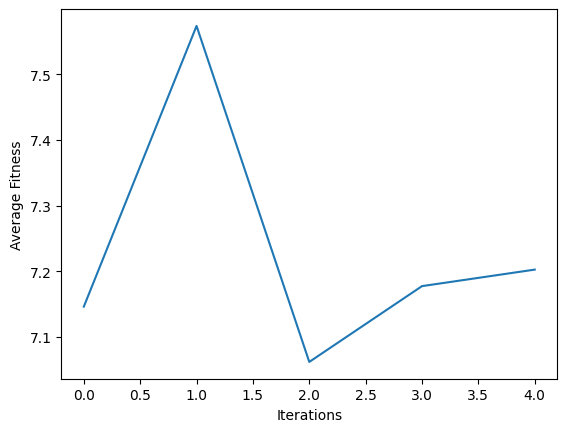

Best Path: [0, 8, 32, 28, 9, 25, 30, 47, 19, 35, 16, 21, 17, 23, 34, 29, 1, 22, 40, 46, 44, 45, 39, 42, 50, 31, 43, 2, 12, 10, 11, 20, 24, 6, 37, 36, 7, 49, 48, 5, 26, 14, 41, 13, 38, 33, 18, 27, 4, 3, 15]
Fitness:  6.711857150486718
Len: 51


In [130]:
min_fit = min(fitnesses)
idx = fitnesses.index(min_fit)
best_path = paths[idx]

plt.plot(range(0, ITERATIONS), av_fitnesses)
plt.xlabel("Iterations")
plt.ylabel("Average Fitness")
plt.show()

print("Best Path:", best_path)
print("Fitness: ", min_fit)
print("Len:", len(best_path))